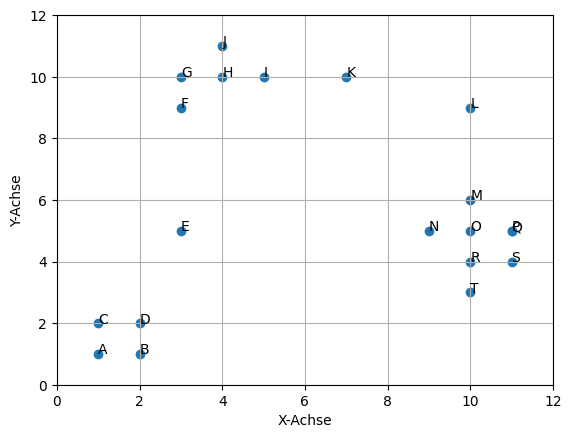

In [1]:
import matplotlib.pyplot as plt

# Koordinaten der Punkte
punkte = {
    'A': (1, 1),
    'B': (2, 1),
    'C': (1, 2),
    'D': (2, 2),
    'E': (3, 5),
    'F': (3, 9),
    'G': (3, 10),
    'H': (4, 10),
    'I': (5, 10),
    'J': (4, 11),
    'K': (7, 10),
    'L': (10, 9),
    'M': (10, 6),
    'N': (9, 5),
    'O': (10, 5),
    'P': (11, 5),
    'Q': (11, 5),
    'R': (10, 4),
    'S': (11, 4),
    'T': (10, 3)
}

# Koordinaten in x- und y-Werte aufteilen
x = [punkt[0] for punkt in punkte.values()]
y = [punkt[1] for punkt in punkte.values()]

# Streudiagramm erstellen
plt.scatter(x, y)

# Deutsche Beschriftungen hinzufügen
for label, (x, y) in punkte.items():
    plt.annotate(label, (x, y))

# Diagrammgrenzen festlegen
plt.xlim(0, 12)
plt.ylim(0, 12)

# Gitter im Diagramm anzeigen
plt.grid(True)

# Achsentitel hinzufügen
plt.xlabel("X-Achse")
plt.ylabel("Y-Achse")

# Diagramm anzeigen
plt.show()


C:\Users\mjzag\AppData\Local\Temp\ipykernel_22924\170744112.py:51: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xy[:, 0], xy[:, 1], c=col, edgecolor='k', s=50, label=f'Cluster {k}')


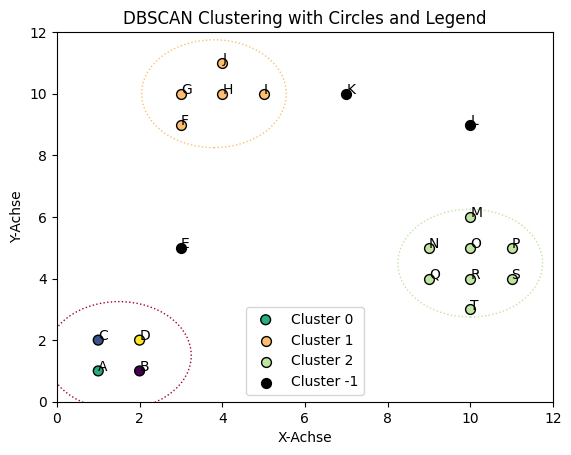

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np
from matplotlib.patches import Circle

# Definindo os pontos
pontos = {
    'A': (1, 1),
    'B': (2, 1),
    'C': (1, 2),
    'D': (2, 2),
    'E': (3, 5),
    'F': (3, 9),
    'G': (3, 10),
    'H': (4, 10),
    'I': (5, 10),
    'J': (4, 11),
    'K': (7, 10),
    'L': (10, 9),
    'M': (10, 6),
    'N': (9, 5),
    'O': (10, 5),
    'P': (11, 5),
    'Q': (9, 4),
    'R': (10, 4),
    'S': (11, 4),
    'T': (10, 3)
}

# Coordenadas em x e y
X = np.array(list(pontos.values()))

# Executar o DBSCAN
dbscan = DBSCAN(eps=1.75, min_samples=4)
dbscan.fit(X)
labels = dbscan.labels_

# Plot dos clusters e circunferências
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

fig, ax = plt.subplots()

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Cor preta para o ruído (cluster -1)

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=col, edgecolor='k', s=50, label=f'Cluster {k}')

    # Desenhar circunferências em torno dos pontos do cluster
    if k != -1:
        circle = Circle(xy.mean(axis=0), radius=1.75, fill=False, color=col, linestyle='dotted')
        ax.add_patch(circle)

# Adicionar rótulos aos pontos A a T
for label, (x, y) in pontos.items():
    plt.annotate(label, (x, y))

# Adicionar legenda
plt.legend()

plt.title('DBSCAN Clustering with Circles and Legend')
plt.xlim(0, 12)
plt.ylim(0, 12)
plt.xlabel("X-Achse")
plt.ylabel("Y-Achse")
plt.show()
